O projeto deve ser feito em grupo 5 ou 6 e será apresentado dia 24/01.
Pode ser apresentado por um ou dois membro(s) da equipe.
Tempo aproximado 10 a 20 min.

Como o projeto será avaliado, o notebook deve conter:
1) Criar uma lista de dicas/técnicas que aprenderam neste módulo que foram usadas no projeto

2) Indicar dentro do notebook cada item da lista (vide exemplo abaixo)

3) Estar publicado no Github

4) Você está apresentando as conclusões dos dados, pense com a cabeça de negócio, ex:

Qual a média de idade dos clientes que mais compraram?
Quantos porcento dos clientes que mais compraram, são os de maior ticket?
Quais os dias da semana os clientes mais compram?
Qual o percentual de crianças e adultos dentro nossos clientes?
Não queremos explicações de como funciona o código, queremos perguntas e respostas de negócio.

Esses quatro itens são obrigatórios, caso contrário não serão aceitos.

01) Leitura de arquivo com dados
02) Preenchimento valores faltantes
03) Normalização
04) Transformação de Categórico para Numérico
05) Tratamento de Datas
06) Demonstração tipos de dados
07) Quantidade de linhas de colunas
08) Mesclagem de Data Frames
09) Eliminar linhas duplicadas
10) Redefinição de indice
11) Agrupamento
12) Criar novas colunas (pode tentar)
13) Aplicar funções e lambdas
14) Encontrar maior/menores valores
15) Separar os top 1%
16) Manipulação de datas
17) Visualização de dados utilizando Matplotlib

In [ ]:
# Item 16) Manipulação de datas
# Pergunta: Quais são os dias da semana... ?
datetime....

Requisitos para a escolha da base de dados:

Esteja em 2 arquivos
Não esteja completo
Tenha dados categóricos(qualitativos) e numéricos(quantitativos)
Tenha datas
Quantidade de campos grande (facilita pensar em perguntas de negócio para responder)

Dataset selecionado:

https://www.kaggle.com/datasets/kzmontage/sales-from-different-stores?select=Different_stores_dataset.csv

Retirar:
    
invoice id
cogs
gross margin
gross income

tarefas:
Fazer Gráfico das Perguntas - Leo    
Adicionar nuvem de palavras - Rafa

****fpdf ou pytofdp, ou pdfkit

Plus* -  Se possível, adicionar um código para exportação do contéudo em pdf.

Usar ! para tarefas feitas.
OK para tarefas prontas com gráficos e perguntas/insights

Perguntas sobre data:
a) Qual o horario de pico. (Dimensionar quantiade de vendeddores e caixas disponiveis para supir picos de visitas, se existirem). (*feriados, sábado, domingo)
! b) Ticket Médio
d) Qual dia do mês mais vende (*feriados, sábado, domingo)
e) Qual horario favorito dos homens/mulheres. 
g) Horario em que mais se vende cada categoria de produto. x horario
f) Ticket médio por horario
g) Horarios mais lucrativos
i) Periodo do mês com maior volume de compras.

Perguntas sobre genero:
a) Qual tipo de genero consome cada tipo dos produtos disponiveis
b) Ticket médio por genero.

a) Média de avaliações
! b) Qual a categoria (top3) das categorias de produtos mais vendidas
! b) Qual a categoria (top3) das categorias de produtos menos vendidas
c) Meio de pagamento x membership (tentar vender cartão da c&a.)
d) Quantidade de Membros x Fidelização
*** dentro de um numero x de vendas no mes, quantas foram para afiliados?


In [5]:
import pandas as pd

In [6]:
df_importacao_completo = pd.read_csv('supermarket_sales.csv')

In [9]:
metade = len(df_importacao_completo) // 2

In [11]:
df_importacao_parte1 = df_importacao_completo.iloc[:metade, :]
df_importacao_parte2 = df_importacao_completo.iloc[metade:, :]

In [12]:
df_importacao_parte1.to_csv('supermarket_sales_1.csv', index=False)
df_importacao_parte2.to_csv('supermarket_sales_2.csv', index=False)

In [13]:
df_parte1 = pd.read_csv('supermarket_sales_1.csv')
df_parte2 = pd.read_csv('supermarket_sales_1.csv')

In [14]:
df = pd.concat([df_parte1, df_parte2], ignore_index=True)

In [15]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,632-32-4574,B,Mandalay,Normal,Male,Sports and travel,75.92,8,30.3680,637.7280,3/20/2019,14:14,Cash,607.36,4.761905,30.3680,5.5
996,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.3220,132.7620,1/1/2019,15:51,Cash,126.44,4.761905,6.3220,8.5
997,862-59-8517,C,Naypyitaw,Normal,Female,Food and beverages,90.24,6,27.0720,568.5120,1/27/2019,11:17,Cash,541.44,4.761905,27.0720,6.2
998,401-18-8016,B,Mandalay,Member,Female,Sports and travel,98.13,1,4.9065,103.0365,1/21/2019,17:36,Cash,98.13,4.761905,4.9065,8.9


In [16]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [17]:
colunas_para_remover = ['Invoice ID', 'cogs', 'gross margin percentage', 'gross income']

In [ ]:
df = df.drop(colunas_para_remover, axis=1)
df

### Pergunta: Qual a divisão de métodos de pagamento por gênero?

In [19]:
import matplotlib.pyplot as plt

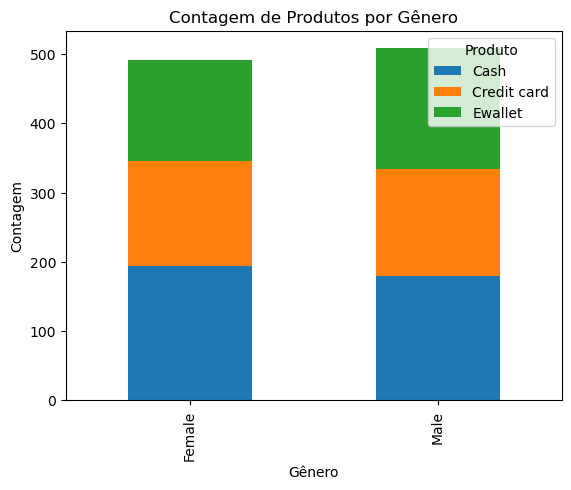

In [26]:
product_gender_count = df.groupby(['Gender', 'Payment']).size().unstack()

product_gender_count.plot(kind='bar', stacked=True)
plt.title('Contagem de Produtos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Produto')

plt.show()


### Pergunta: Qual a relação entre os afiliados e os não afiliados?

In [81]:
df_membros = df['Customer type'].value_counts()

In [82]:
df_membros

Customer type
Normal    518
Member    482
Name: count, dtype: int64

In [105]:
membros_afiliados = df.loc[df['Customer type'] == 'Member']
membros_normais = df.loc[df['Customer type'] == 'Normal']

In [98]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

In [108]:
membros_normais['Customer type']

1      Normal
2      Normal
4      Normal
5      Normal
7      Normal
        ...  
990    Normal
994    Normal
995    Normal
996    Normal
997    Normal
Name: Customer type, Length: 518, dtype: object

In [132]:
df_membros['Member']

482

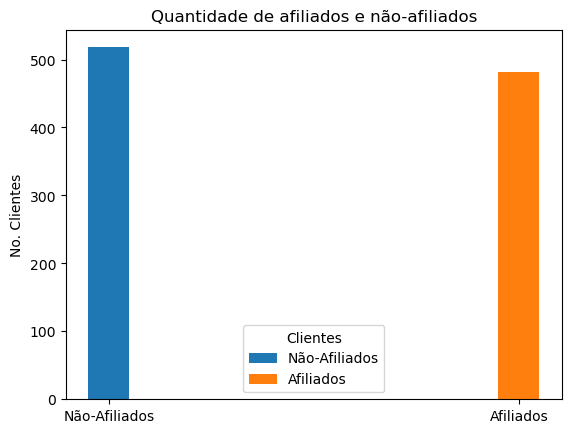

In [140]:
fig, ax = plt.subplots()

fruits = ['Não-Afiliados', 'Afiliados']
counts = [df_membros['Normal'], df_membros['Member']]
bar_labels = ['blue', 'orange']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(fruits, counts, label=fruits, color=bar_colors, width=0.1)

ax.set_ylabel('No. Clientes')
ax.set_title('Quantidade de afiliados e não-afiliados')
ax.legend(title='Clientes')

plt.show()

## Ticket Médio

In [60]:
df['Total'].mean()

329.995701

## Top3 das categorias de produtos mais vendidas

In [61]:
df.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'Rating'],
      dtype='object')

In [64]:
produtos_mais_vendidos = df.groupby('Product line')['Quantity'].sum()
produtos_mais_vendidos

Product line
Electronic accessories    956
Fashion accessories       918
Food and beverages        980
Health and beauty         884
Home and lifestyle        956
Sports and travel         998
Name: Quantity, dtype: int64

In [69]:
top3_mais_vendidos = produtos_mais_vendidos.sort_values(ascending=False).head(3)
top3_mais_vendidos

Product line
Sports and travel         998
Food and beverages        980
Electronic accessories    956
Name: Quantity, dtype: int64

## Top3 das categorias de produtos menos vendidas

In [71]:
produtos_menos_vendidos = df.groupby('Product line')['Quantity'].sum()
produtos_menos_vendidos

Product line
Electronic accessories    956
Fashion accessories       918
Food and beverages        980
Health and beauty         884
Home and lifestyle        956
Sports and travel         998
Name: Quantity, dtype: int64

In [72]:
top3_menos_vendidos = produtos_menos_vendidos.sort_values(ascending=True).head(3)
top3_menos_vendidos

Product line
Health and beauty         884
Fashion accessories       918
Electronic accessories    956
Name: Quantity, dtype: int64

## Data

In [74]:
df['Date'] = pd.to_datetime(df['Date'])

In [75]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-03-20
996   2019-01-01
997   2019-01-27
998   2019-01-21
999   2019-02-02
Name: Date, Length: 1000, dtype: datetime64[ns]

## Compras por gênero

In [143]:
valores_distintos = df['Product line'].unique()
valores_distintos

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (3,).

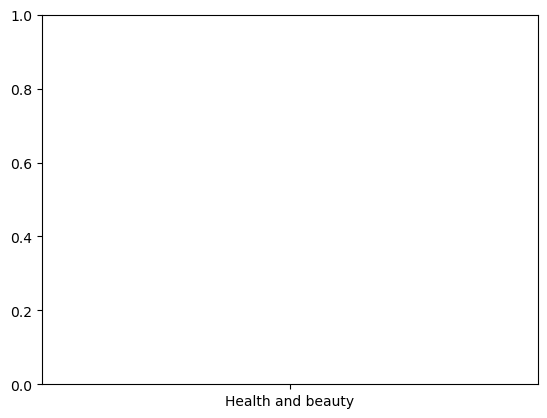

In [145]:
species = valores_distintos
sex_counts = {
    'Male': np.array([73, 34, 61]),
    'Female': np.array([73, 34, 58]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()